In [38]:
import matplotlib.pyplot as plt
import yaml
import os
import numpy as np

dimension explorations:

clear improvment from 1 to 2 layers
from 2 to higher the improvment is not worth the aditional number of parameters.

but a lot of overfitting!
would batchnorm and ropout prevent it and increase performances?


see test below, batchnorm does not improve.
what about dropout?

In [39]:
gathered_metric_path = "/home/yannh/Documents/uni/phd/classes/pai/costum_project/results/batchsize_test/gathered_metrics.yaml"
with open(gathered_metric_path, 'r') as file:
    gathered_metrics = yaml.safe_load(file)
n_models = len(gathered_metrics)
metrics = np.empty((n_models, 8), dtype=object)


for i_m, models in enumerate(gathered_metrics):
    model_metric = gathered_metrics[models]
    #print(models)
    if "RegularizedNoBN" in models:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], model_metric["dropout"], "RegNoBN"
    else:
        metrics[i_m] = model_metric["total_MAE"], model_metric["total_MSE"], model_metric["total_RMSE"], model_metric["hidden_dim"], model_metric["learning_rate"], model_metric["batch_size"], "", ""
        
    



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


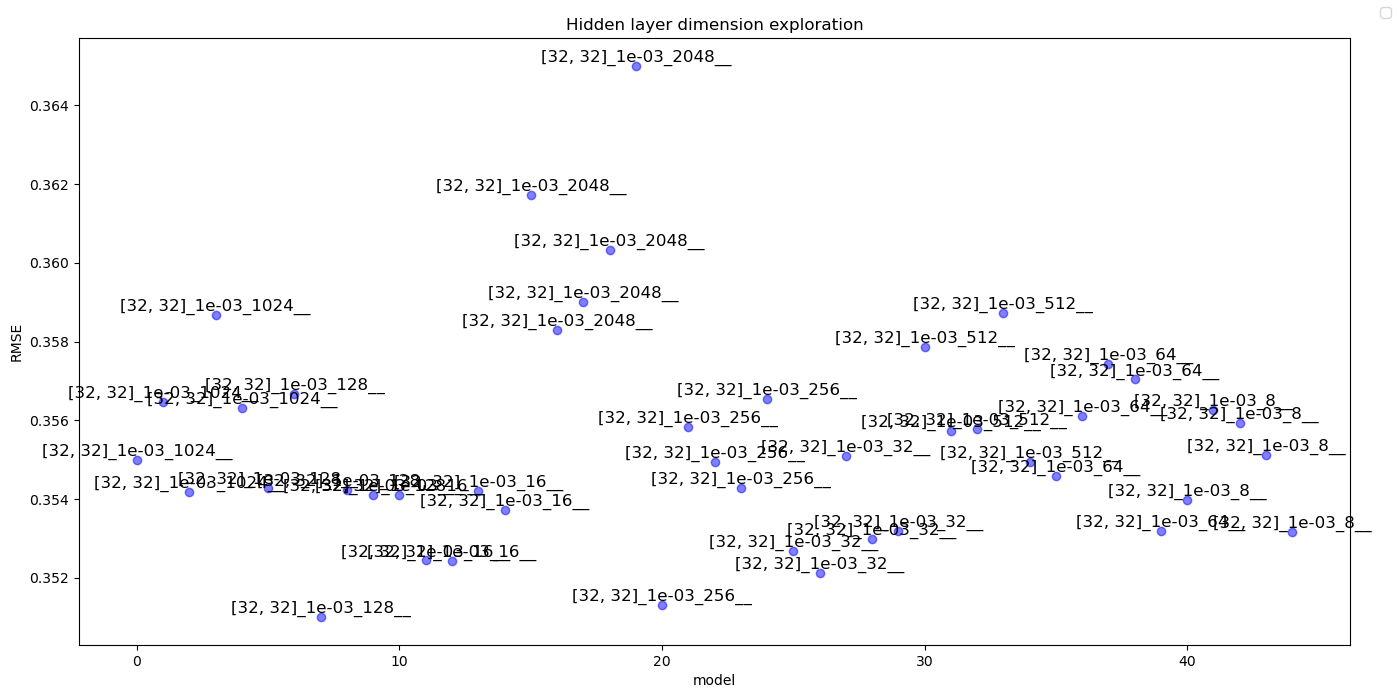

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))

ax.scatter(np.arange(n_models,dtype=int), metrics[:, 2], c="blue", alpha=0.5)
ax.set_xlabel("model")
ax.set_ylabel("RMSE")
ax.set_title("Hidden layer dimension exploration")

for j in range(n_models):
    # if metrics[j, 2] > 0.4:
    #     continue
    ax.text(j, metrics[j, 2], f"{metrics[j, 3]}_{metrics[j, 4]:.0e}_{metrics[j, 5]}_{metrics[j, 6]}_{metrics[j, 7]}", ha="center", va="bottom", fontsize=12)
fig.legend()

#ax.set(ylim=(0.35, 0.4))
plt.tight_layout()
plt.show()
    

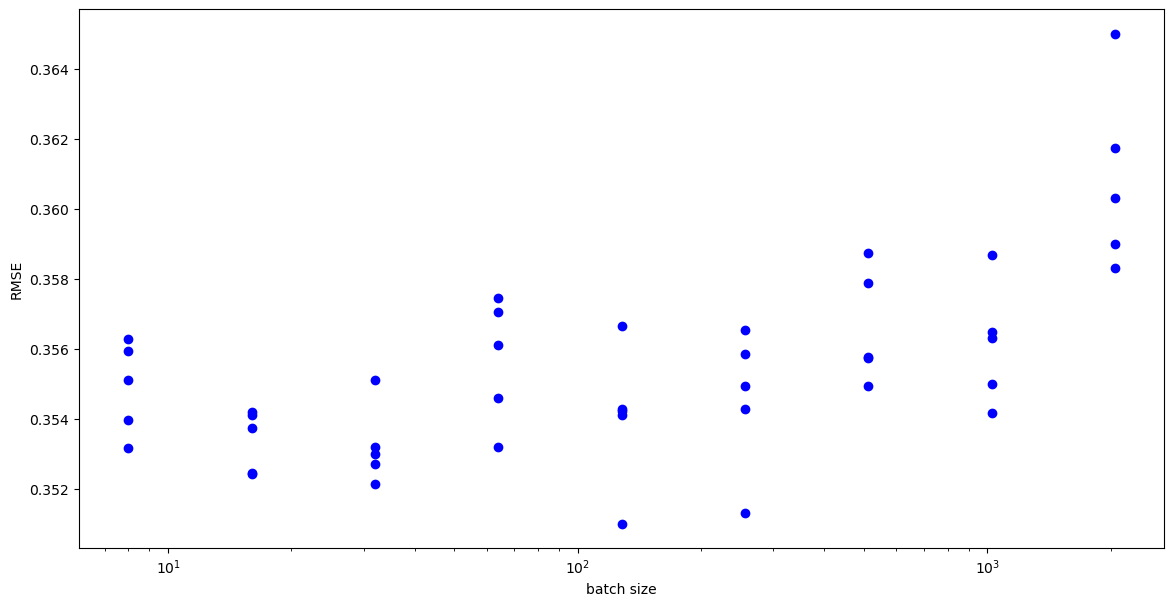

In [41]:
N_DIMENSION = 8
b_size = np.empty(n_models, dtype=int)
for i_d, d in enumerate(metrics[:, 5]):
    b_size[i_d] = d
    
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.scatter(b_size, metrics[:, 2], c="blue")
ax.set(xlabel="batch size", ylabel="RMSE")
ax.set(xscale="log")
plt.show()

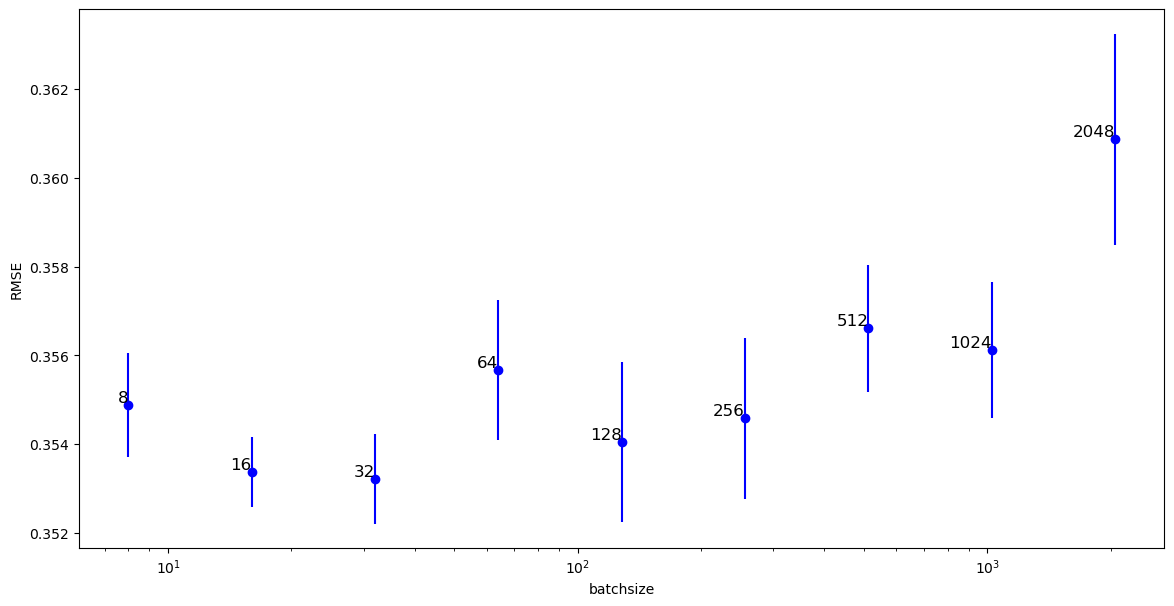

In [42]:
BS = np.unique(metrics[:, 5])
mean_rmse_per_bs = np.empty(BS.size, dtype=float)
std_rmse_per_bs = np.empty(BS.size, dtype=float)
for i, bs in enumerate(BS):
    mean_rmse_per_bs[i] = metrics[:, 2][b_size == bs].mean()
    std_rmse_per_bs[i] = metrics[:, 2][b_size == bs].std()


fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.errorbar(BS, mean_rmse_per_bs, yerr=std_rmse_per_bs, fmt='o', c="blue")
ax.set(xlabel="batchsize", ylabel="RMSE")
for i_b, b in enumerate(BS):
    ax.text(b, mean_rmse_per_bs[i_b], b, ha="right", va="bottom", fontsize=12)
ax.set(xscale="log")
plt.show()